# Bank Customer churn prediction

# Rohit Tyagi



Model Accuracy: 0.80


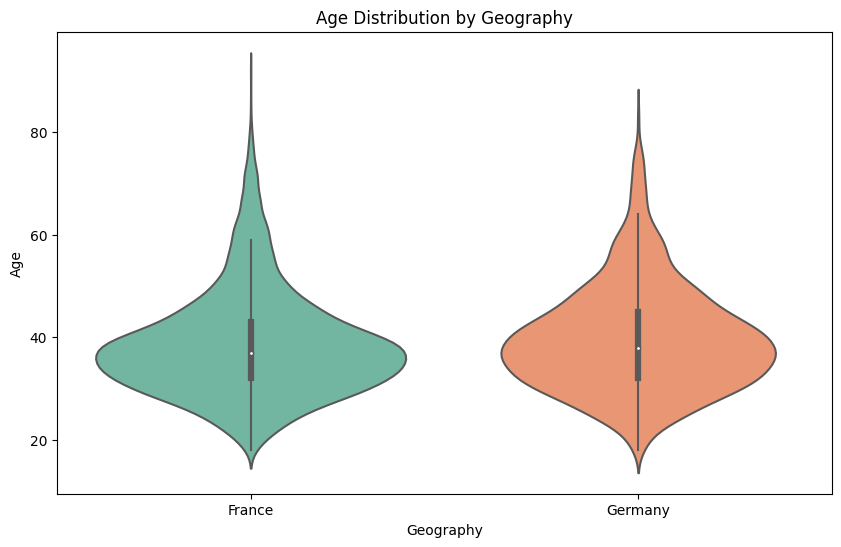

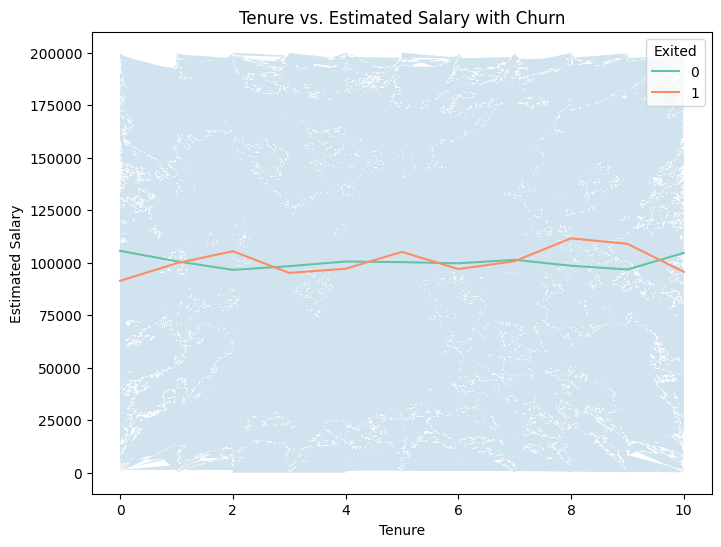

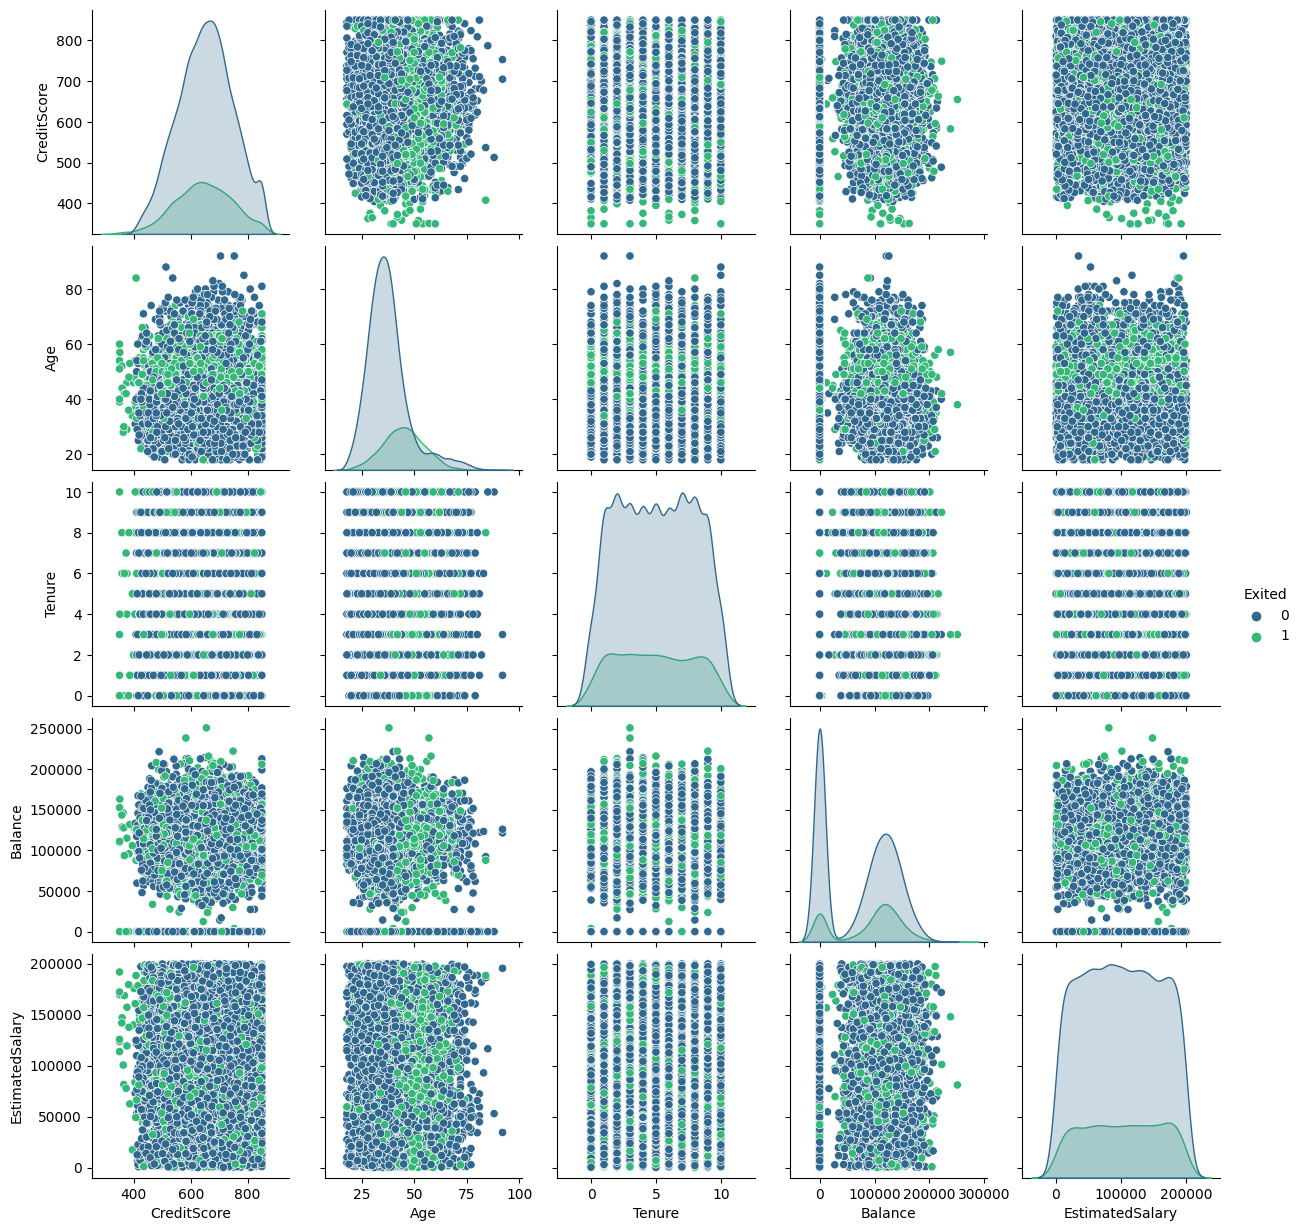

<ipython-input-2-ec741bd933f3>:43: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


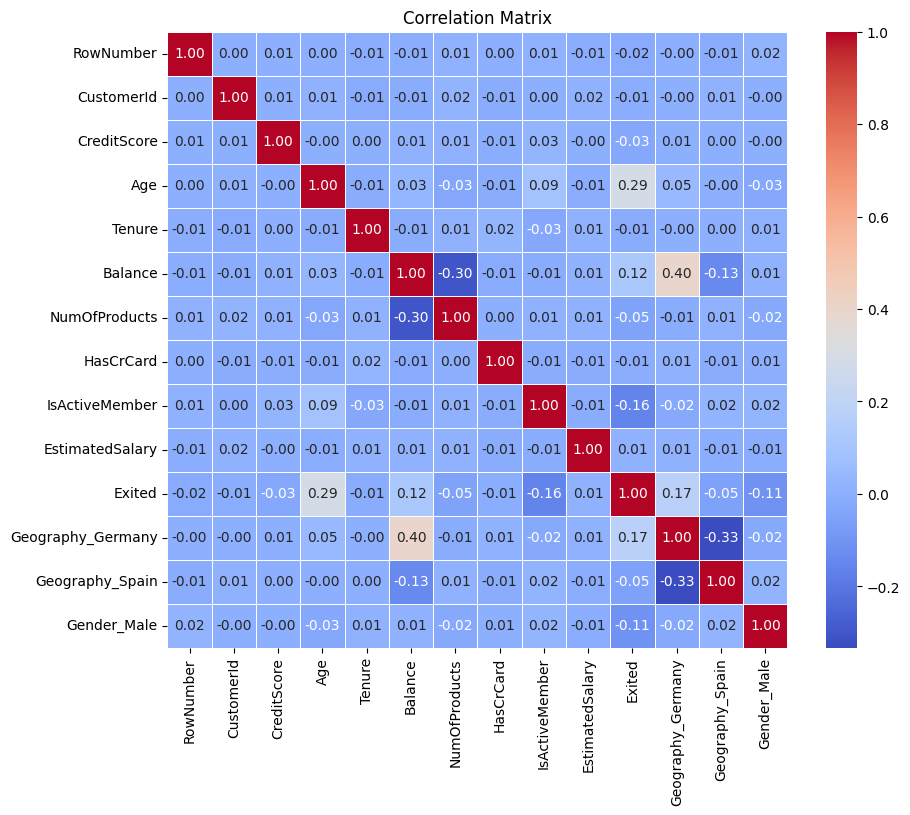

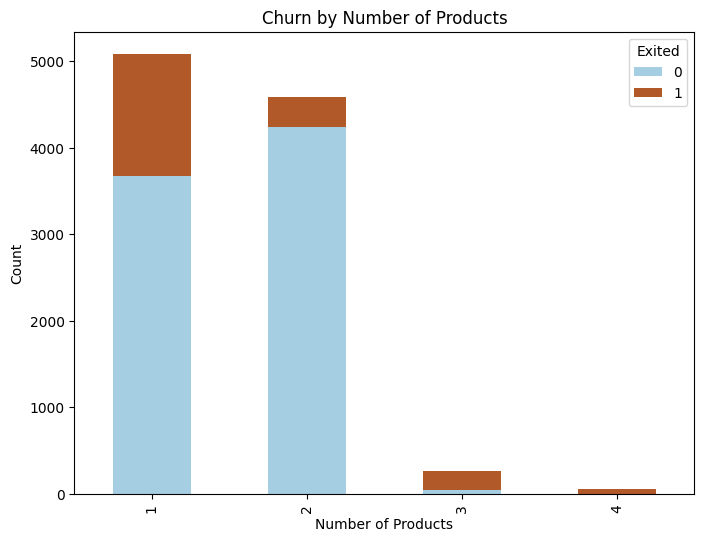

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = pd.read_csv('/content/Churn_Modelling.csv')
data = data.drop(['Surname'], axis=1)
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)
geography_mapping = {0: 'France', 1: 'Germany', 2: 'Spain'}
data['Geography_Label'] = data['Geography_Germany'].map(geography_mapping)

X = data.drop(['Exited', 'Geography_Label'], axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

plt.figure(figsize=(10, 6))
sns.violinplot(x='Geography_Label', y='Age', data=data, palette='Set2')
plt.xlabel('Geography')
plt.ylabel('Age')
plt.title('Age Distribution by Geography')
plt.show()

plt.figure(figsize=(8, 6))
sns.lineplot(x='Tenure', y='EstimatedSalary', data=data, hue='Exited', palette='Set2', errorbar=None)
plt.fill_between(data['Tenure'], data['EstimatedSalary'], alpha=0.2)
plt.xlabel('Tenure')
plt.ylabel('Estimated Salary')
plt.title('Tenure vs. Estimated Salary with Churn')
plt.show()

sns.pairplot(data[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Exited']], hue='Exited', palette='viridis')
plt.show()

plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

ct = pd.crosstab(data['NumOfProducts'], data['Exited'])
ct.plot(kind='bar', stacked=True, colormap='Paired', figsize=(8, 6))
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.title('Churn by Number of Products')
plt.show()
